In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('imagenes/rosas/defectuosa/defecto1.jpeg', 0)
img_rgb = cv2.imread('imagenes/rosas/defectuosa/defecto1.jpeg', 1)
img = cv2.resize(img, (500, 550))
img_rgb = cv2.resize(img, (500, 550))

# cv2.imshow('Image', img)
# cv2.waitKey(0)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

rojoBajo1 = np.array([0, 100, 20], np.uint8)
rojoAlto1 = np.array([8, 255, 255], np.uint8)
rojoBajo2 = np.array([175, 100, 20], np.uint8)
rojoAlto2 = np.array([179, 255, 255], np.uint8)

mascaraDefecto1 = cv2.inRange(img_hsv, rojoBajo1, rojoAlto1)
mascaraDefecto2 = cv2.inRange(img_hsv, rojoBajo2, rojoAlto2)
mascaraDefecto = cv2.add(mascaraDefecto1, mascaraDefecto2)

cv2.imshow('Deteccion de defectos', mascaraDefecto)
cv2.imshow('Original', img_hsv)
cv2.waitKey(0)

In [3]:
# contamos con una imagen en escala de grises declarada anteriormente
# cambiamos el tamaño de la imagen
# img_blur = cv2.blur(img, (6,6))
_, binarizada = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
_, binarizada_inv = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
'''Podria agregar un blur para no tener mucha interferencia del fonto'''

cv2.imshow('Original - binary', np.hstack([img_rgb, binarizada]))
# cv2.imshow('Binary Inv', binarizada_inv)
cv2.waitKey(0)

-1

# Histograma de una imagen

In [4]:
# Lectura, redimencion y conversion de la imagen
img1 = cv2.imread('imagenes/rosas/calidad/IMG_20210322_140118.jpg')
img1 = cv2.resize(img1, (500, 600))
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [5]:
# Creacion del histograma
histograma = cv2.calcHist([img_gray], [0], None, [256], [0, 255])

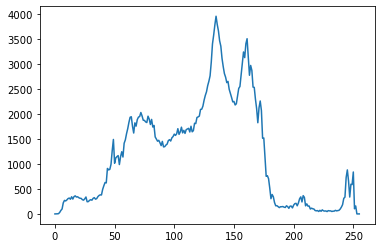

In [6]:
plt.plot(histograma)
plt.show()

In [7]:
cv2.imshow('Imagen original', img1)
cv2.waitKey(0)

-1

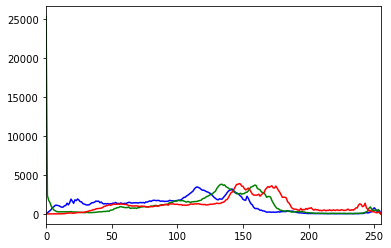

In [8]:
color = ('b','g','r')
for i,col in enumerate(color):
    histograma = cv2.calcHist([img1],[i],None,[256],[0,255])
    plt.plot(histograma,color = col)
    plt.xlim([0,255])
plt.show()

¿Que queremos hacer? -> detectar caracteristicas del boton de una rosa

¿Cuales son esas caracteristicas? -> color, apertura, deformidades, enfermedades en los petalos

¿Que metodos podemos emplear para detectar el color? -> deteccion de color con el espacio de color HSV

¿Que metodo podemos emplear para detectar la apertura de color? deteccion de bordes, deteccion de figuras(circulos)

¿Que metodos podemos emplear para detectar que no este deforme? -> deteccion de bordes, deteccion de figuras(circulos)

¿Que metodos podemos emplear para detectar las partes dañadas en el boton? thresholding